In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Fetch the data
url = "https://raw.githubusercontent.com/hantswilliams/HHA_507_2023/main/WK4/examples/jupyter-viola/cdc_places_ny.csv"
df = pd.read_csv(url)
df.columns

Index(['Year', 'StateAbbr', 'StateDesc', 'LocationName', 'DataSource',
       'Category', 'Measure', 'Data_Value_Unit', 'Data_Value_Type',
       'Data_Value', 'Data_Value_Footnote_Symbol', 'Data_Value_Footnote',
       'Low_Confidence_Limit', 'High_Confidence_Limit', 'TotalPopulation',
       'LocationID', 'CategoryID', 'MeasureId', 'DataValueTypeID',
       'Short_Question_Text', 'Geolocation'],
      dtype='object')

In [3]:
# Filter for 'BINGE' as measureid and 'Age-adjusted prevalence' as data_value_type
df = df[(df['MeasureId'] == 'BINGE') & (df['Data_Value_Type'] == 'Age-adjusted prevalence')]
df

,Year,StateAbbr,StateDesc,LocationName,DataSource,Category,Measure,Data_Value_Unit,Data_Value_Type,Data_Value,...,Data_Value_Footnote,Low_Confidence_Limit,High_Confidence_Limit,TotalPopulation,LocationID,CategoryID,MeasureId,DataValueTypeID,Short_Question_Text,Geolocation
335,2021,NY,New York,Orange,BRFSS,Health Risk Behaviors,Binge drinking among adults aged >=18 years,%,Age-adjusted prevalence,17.1,...,NaN,14.6,19.9,404525,36071,RISKBEH,BINGE,AgeAdjPrv,Binge Drinking,POINT (-74.3062522 41.4024096)
437,2021,NY,New York,Steuben,BRFSS,Health Risk Behaviors,Binge drinking among adults aged >=18 years,%,Age-adjusted prevalence,20.0,...,NaN,17.2,23.0,92948,36101,RISKBEH,BINGE,AgeAdjPrv,Binge Drinking,POINT (-77.3855253 42.2667252)
490,2021,NY,New York,Oswego,BRFSS,Health Risk Behaviors,Binge drinking among adults aged >=18 years,%,Age-adjusted prevalence,19.7,...,NaN,17.1,22.7,117387,36075,RISKBEH,BINGE,AgeAdjPrv,Binge Drinking,POINT (-76.2092618 43.4614431)
499,2021,NY,New York,St. Lawrence,BRFSS,Health Risk Behaviors,Binge drinking among adults aged >=18 years,%,Age-adjusted prevalence,20.3,...,NaN,17.5,23.3,108051,36089,RISKBEH,BINGE,AgeAdjPrv,Binge Drinking,POINT (-75.074311 44.4881125)
541,2021,NY,New York,Orleans,BRFSS,Health Risk Behaviors,Binge drinking among adults aged >=18 years,%,Age-adjusted prevalence,18.1,...,NaN,15.4,21.1,40191,36073,RISKBEH,BINGE,AgeAdjPrv,Binge Drinking,POINT (-78.2070281 43.3399059)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4286,2021,NY,New York,Cortland,BRFSS,Health Risk Behaviors,Binge drinking among adults aged >=18 years,%,Age-adjusted prevalence,18.5,...,NaN,15.6,21.5,46311,36023,RISKBEH,BINGE,AgeAdjPrv,Binge Drinking,POINT (-76.0762398 42.594039)
4301,2021,NY,New York,Cattaraugus,BRFSS,Health Risk Behaviors,Binge drinking among adults aged >=18 years,%,Age-adjusted prevalence,19.4,...,NaN,16.5,22.4,76426,36009,RISKBEH,BINGE,AgeAdjPrv,Binge Drinking,POINT (-78.662332 42.2390986)
4356,2021,NY,New York,Lewis,BRFSS,Health Risk Behaviors,Binge drinking among adults aged >=18 years,%,Age-adjusted prevalence,19.1,...,NaN,16.3,22.2,26573,36049,RISKBEH,BINGE,AgeAdjPrv,Binge Drinking,POINT (-75.4441402 43.7826811)
4431,2021,NY,New York,Greene,BRFSS,Health Risk Behaviors,Binge drinking among adults aged >=18 years,%,Age-adjusted prevalence,21.0,...,NaN,17.9,24.3,48499,36039,RISKBEH,BINGE,AgeAdjPrv,Binge Drinking,POINT (-74.1420253 42.2798211)


In [4]:
# Group by 'LocationName' and get the average (or sum) 'Data_Value'
grouped = df.groupby('LocationName').Data_Value.mean().sort_values(ascending=False)
grouped


LocationName
Hamilton    21.5
Saratoga    21.3
Greene      21.0
Essex       20.9
Herkimer    20.7
            ... 
Kings       16.2
Richmond    15.3
Rockland    15.0
Queens      14.6
Bronx       13.3
Name: Data_Value, Length: 62, dtype: float64

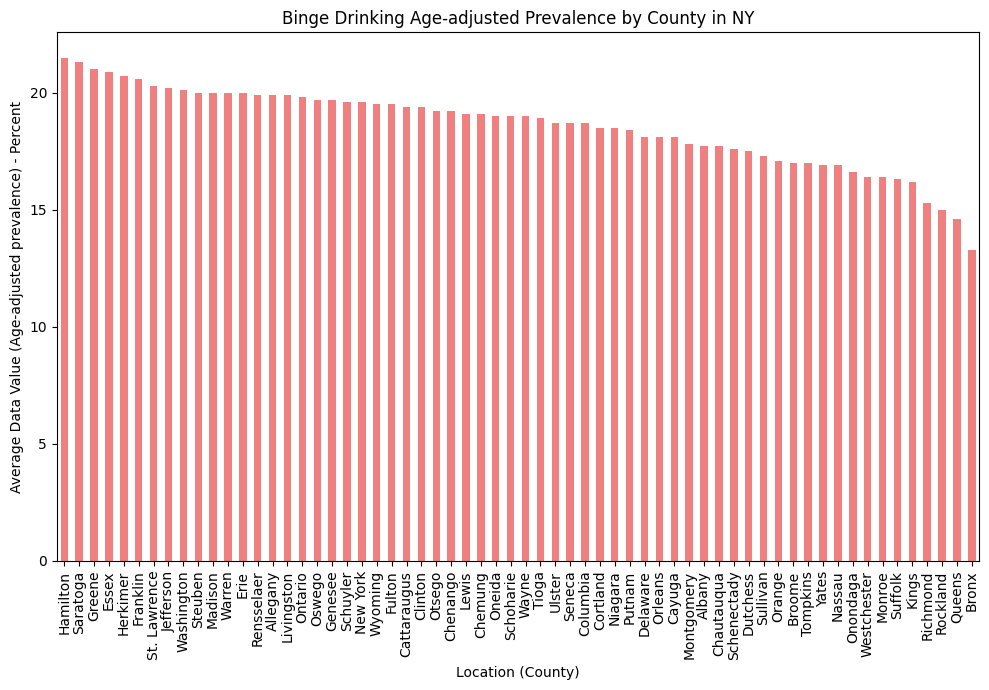

In [5]:
# Plotting
plt.figure(figsize=(10, 7))
grouped.plot(kind='bar', color='lightcoral')
plt.ylabel('Average Data Value (Age-adjusted prevalence) - Percent')
plt.xlabel('Location (County)')
plt.title('Binge Drinking Age-adjusted Prevalence by County in NY')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig("binge_drinking_per_location.png")  # Saving the plot as an image
plt.show()

In [6]:
import ipywidgets as widgets

# Compute the average data value across all counties
avg_data_value = df['Data_Value'].mean()

# Sort the counties in ascending order for the dropdown list
sorted_counties = sorted(df['LocationName'].unique())

# Interactive selection of county for visualization using ipywidgets
@widgets.interact(County=sorted_counties)
def plot_data(County):
    county_value = df[df['LocationName'] == County]['Data_Value'].values[0]

    # Labels for bars
    labels = [County, 'Average across all counties']

    # Data values for bars
    values = [county_value, avg_data_value]

    plt.figure(figsize=(8, 6))

    # Plot the bars
    colors = ['lightcoral', 'lightblue']
    plt.bar(labels, values, color=colors)

    plt.ylabel('Data Value (Age-adjusted prevalence) - Percent')
    plt.title(f'Binge Drinking Age-adjusted Prevalence in {County} vs Average across all counties')

    plt.tight_layout()
    plt.show()


interactive(children=(Dropdown(description='County', options=('Albany', 'Allegany', 'Bronx', 'Broome', 'Cattar…